# **Labeled Data, Unlabeled Data and Decision Tree Model: [HERE](https://drive.google.com/drive/folders/1QSk0Btd-etEkVZRQx99lnu8fQFKC3Gz_?usp=sharing)**

#Data Preprocceseing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

from pickle import dump, load
from google.colab import files

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1t0Ta_LaWR_jLhZwaNG3us9f6vAX-1DV4')

In [ ]:
labels = data['class']
data = data.drop('class', axis = 1)

In [ ]:
data.head()

,protocol_type,service,flag,src_bytes,dst_bytes,count,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate
0,tcp,ftp_data,SF,491,0,2,1.00,25,0.17,0.17
1,udp,other,SF,146,0,13,0.08,1,0.00,0.88
2,tcp,private,S0,0,0,123,0.05,26,0.10,0.00
3,tcp,http,SF,232,8153,5,1.00,255,1.00,0.03
4,tcp,http,SF,199,420,30,1.00,255,1.00,0.00


In [2]:
data.info()

NameError: name 'data' is not defined

In [ ]:
data.describe()

,src_bytes,dst_bytes,count,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate
count,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,2.433063e+04,3.491847e+03,84.591180,0.660559,115.063036,0.519791,0.147453
std,2.410805e+06,8.883072e+04,114.673451,0.439637,110.646850,0.448944,0.308367
min,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,2.000000,0.090000,10.000000,0.050000,0.000000
50%,4.400000e+01,0.000000e+00,14.000000,1.000000,61.000000,0.510000,0.000000
75%,2.790000e+02,5.302500e+02,144.000000,1.000000,255.000000,1.000000,0.060000
max,3.817091e+08,5.151385e+06,511.000000,1.000000,255.000000,1.000000,1.000000


In [ ]:
print(f"Shape: {data.shape} \n")
print(f"Null values: \n{data.isnull().sum()} \n")
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Shape: (25192, 10) 

Null values: 
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
count                          0
same_srv_rate                  0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_same_src_port_rate    0
dtype: int64 

Number of duplicate rows: 1643


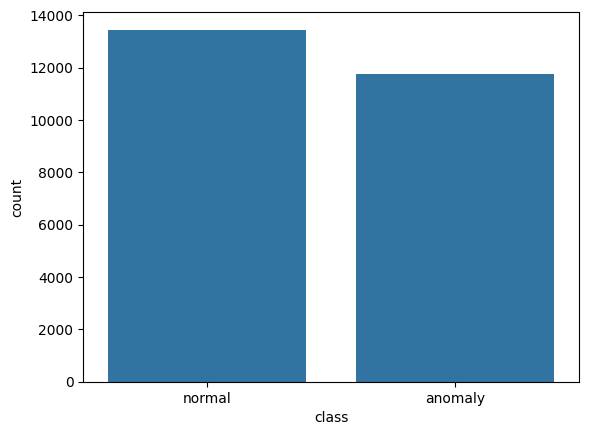

In [ ]:
sns.countplot(x=labels)
plt.show()

In [ ]:
# To change String values in data
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(data)

data = pd.DataFrame(encoder.transform(data), columns=data.columns)
labels = pd.Series(LabelEncoder().fit_transform(labels))

In [ ]:
data.head()

,protocol_type,service,flag,src_bytes,dst_bytes,count,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate
0,1.0,19.0,9.0,414.0,0.0,1.0,96.0,25.0,17.0,17.0
1,2.0,41.0,9.0,126.0,0.0,12.0,8.0,1.0,0.0,88.0
2,1.0,46.0,5.0,0.0,0.0,122.0,5.0,26.0,10.0,0.0
3,1.0,22.0,9.0,212.0,2892.0,4.0,96.0,255.0,100.0,3.0
4,1.0,22.0,9.0,179.0,362.0,29.0,96.0,255.0,100.0,0.0


In [ ]:
labels.head()

0    1
1    1
2    0
3    1
4    1
dtype: int64

#Model Training

In [ ]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.80, random_state=42, shuffle=True)

In [ ]:
# Normalizing features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = model.predict(x_test)
target_names=["anamoly", "normal"]

print(f"Accuracy: %{accuracy_score(y_test, predictions)*100}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}\n")
print(f"Classification Report:\n{classification_report(y_test, predictions,target_names=target_names)}")

Accuracy: %99.5435602302044

Confusion Matrix:
[[2354   11]
 [  12 2662]]

Classification Report:
              precision    recall  f1-score   support

     anamoly       0.99      1.00      1.00      2365
      normal       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [ ]:
dump(model, open('model.pkl', 'wb'))
# files.download('model.pkl')


# New Unlabeled Data Model Performance


In [ ]:
# Model loading
model = load(open('model.pkl', 'rb'))

In [ ]:
# New Unlabeled Data
new_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1YalYL0N74nbCB2hl17Tuqu9PuHRaRYVo')

new_data = pd.DataFrame(encoder.transform(new_data), columns=new_data.columns)

In [ ]:
new_data.head()

,protocol_type,service,flag,src_bytes,dst_bytes,count,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate
0,1.0,46.0,1.0,0.0,0.0,228.0,4.0,10.0,4.0,0.0
1,1.0,46.0,1.0,0.0,0.0,135.0,1.0,1.0,0.0,0.0
2,1.0,19.0,9.0,1581.0,0.0,0.0,96.0,86.0,61.0,61.0
3,0.0,13.0,9.0,18.0,0.0,0.0,96.0,57.0,100.0,100.0
4,1.0,57.0,2.0,0.0,3.0,0.0,96.0,86.0,31.0,3.0


In [ ]:
new_data_predictions = model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
normal_cnt, anamoly_cnt = 0, 0

for i in range(len(new_data_predictions)):
  if new_data_predictions[i]== 1:
    normal_cnt += 1
    # print("normal")
  else:
    anamoly_cnt += 1
    # print("anamoly")

print(f"Normal Counter: {normal_cnt}")
print(f"Anamoly Counter: {anamoly_cnt}")

Normal Counter: 20992
Anamoly Counter: 1551
